In [1]:
import pandas as pd
from sklearn import preprocessing

In [2]:
from seaborn import heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

palette = sns.color_palette("PiYG", as_cmap=True)
sns.set(rc={'text.usetex':False, 'font.family':'sans-serif','figure.facecolor':"white",'axes.facecolor':"white"})

In [3]:
idx  = 37 # index_can_be_processed_by_all

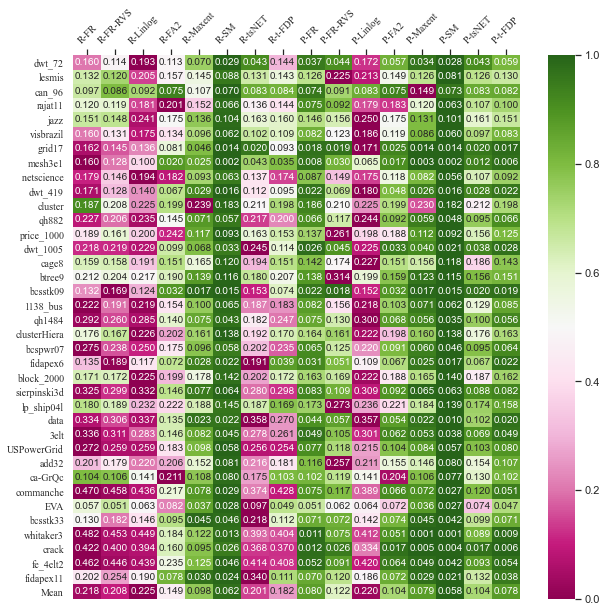

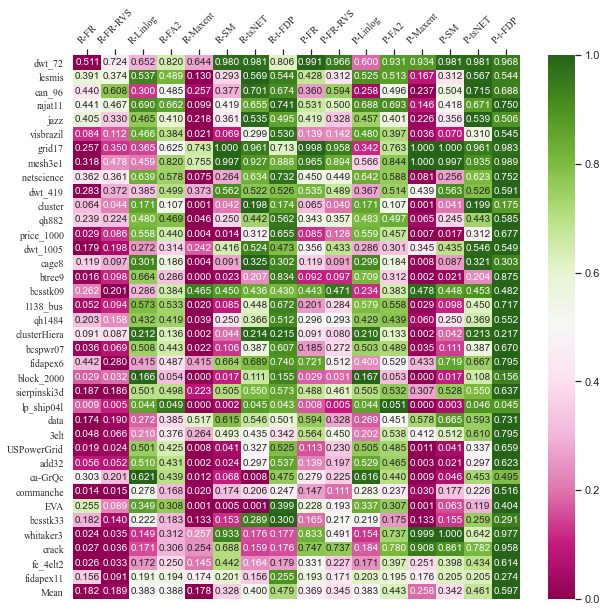

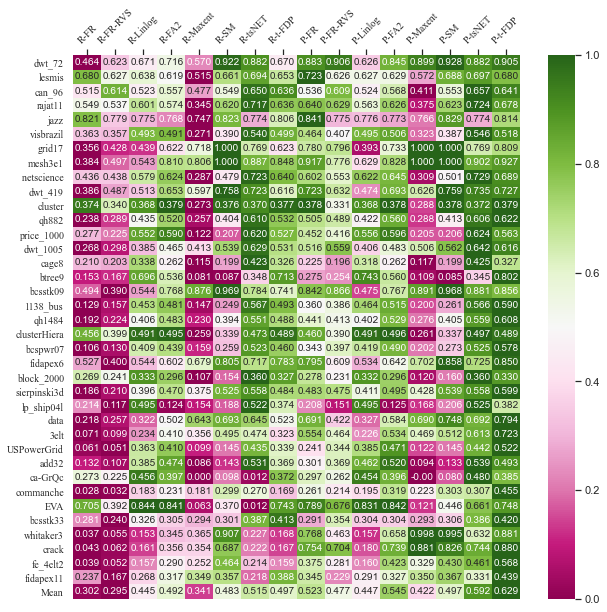

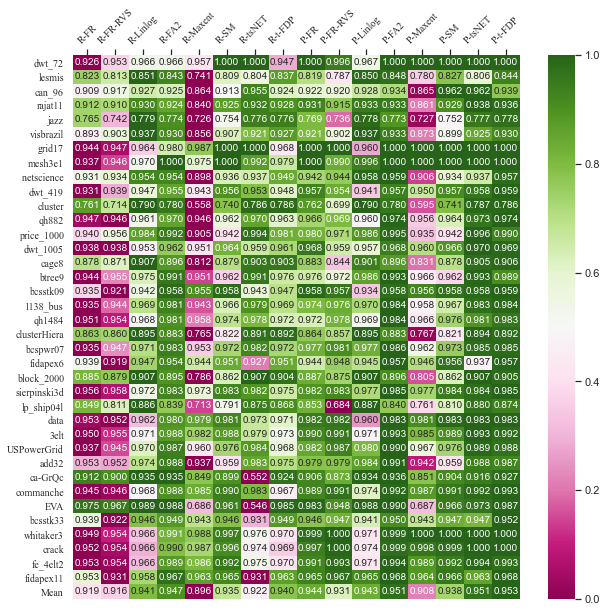

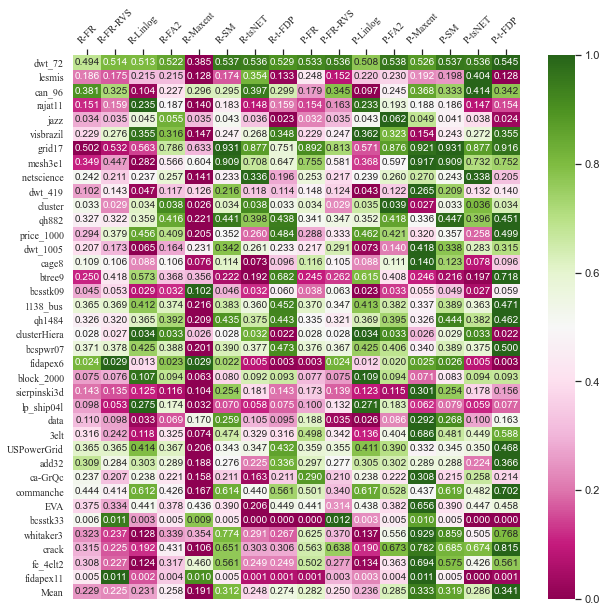

In [4]:
metrics = ["SE","NP1","NP2","EC","MA"]
for m in metrics:
    df_rd = pd.read_csv("./results/RD_" + m +".csv",index_col=0)[:idx]
    df_pmds = pd.read_csv("./results/" + m +".csv",index_col=0)[["FR","FR-RVS","Linlog","FA2","Maxent","SM","tsNET","t-FDP"]][:idx]
    df_rd = df_rd.rename(columns= lambda x : "R-" + x)
    df_pmds = df_pmds.rename(columns= lambda x : "P-" + x)
    df = pd.concat([df_rd,df_pmds],axis=1)
    df = df[["R-FR","R-FR-RVS","R-Linlog","R-FA2","R-Maxent","R-SM","R-tsNET","R-t-FDP","P-FR","P-FR-RVS","P-Linlog","P-FA2"
                ,"P-Maxent","P-SM","P-tsNET","P-t-FDP"]]
    df.loc["Mean"] = df.mean()
    x = df.values 
    min_max_scaler = preprocessing.MinMaxScaler() # 
    if m == "SE":
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(1 - df.T).T, columns=df.columns, index=df.index)
    else:
        maxminnorm_df = pd.DataFrame(min_max_scaler.fit_transform(df.T).T, columns=df.columns, index=df.index)
    df_NA = df.applymap(lambda x: '-'  if not pd.notna(x) else '{:,.3f}'.format(x))
    plt.figure(figsize=(10,10))
    ax = heatmap(maxminnorm_df.fillna(0.5),annot=df_NA,fmt=".5s",cmap=palette,annot_kws={"size": 10})

    ax.xaxis.tick_top() 
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=45,fontsize=10,fontname="Times New Roman")
    plt.yticks(fontsize=10,fontname="Times New Roman")
    plt.savefig("./Figs/SuppFigs7-8Heatmap_PMDSRD/" + m + ".pdf")
    plt.show()